In [40]:
import urllib.request
import string
url = 'https://www.gutenberg.org/files/2701/2701-0.txt'
response = urllib.request.urlopen(url)
data = response.read()
text = data.decode('utf-8')

In [41]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt') 
tokens = word_tokenize(text)
# drop the punctuation
# when try to use word.lower(), the pog_tag will not mistakely take NNP as VB
tokens = [word for word in tokens if word not in string.punctuation]
tokens


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\12552\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['\ufeffThe',
 'Project',
 'Gutenberg',
 'eBook',
 'of',
 'Moby-Dick',
 'or',
 'The',
 'Whale',
 'by',
 'Herman',
 'Melville',
 'This',
 'eBook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'in',
 'the',
 'United',
 'States',
 'and',
 'most',
 'other',
 'parts',
 'of',
 'the',
 'world',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 'You',
 'may',
 'copy',
 'it',
 'give',
 'it',
 'away',
 'or',
 're-use',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'Project',
 'Gutenberg',
 'License',
 'included',
 'with',
 'this',
 'eBook',
 'or',
 'online',
 'at',
 'www.gutenberg.org',
 'If',
 'you',
 'are',
 'not',
 'located',
 'in',
 'the',
 'United',
 'States',
 'you',
 'will',
 'have',
 'to',
 'check',
 'the',
 'laws',
 'of',
 'the',
 'country',
 'where',
 'you',
 'are',
 'located',
 'before',
 'using',
 'this',
 'eBook',
 'Title',
 'Moby-Dick',
 'or',
 'The',
 'Whale',
 'Author',
 'Herman',
 'Melville',
 'Release',
 'Date',
 '

In [67]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
filtered_tokens = [w for w in tokens if not w in stop_words]
filtered_tokens = [w for w in filtered_tokens if w.lower() not in stop_words]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\12552\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [68]:
from nltk import pos_tag
from collections import Counter
nltk.download('averaged_perceptron_tagger')
pos_tagged_tokens = pos_tag(filtered_tokens)
pos_tags = [tag for _, tag in pos_tagged_tokens]
pos_freq = Counter(pos_tags)
top_five_pos = pos_freq.most_common(5)
for pos, freq in top_five_pos:
    print(f"{pos}: {freq}")




[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\12552\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


NN: 28582
JJ: 21439
NNP: 15704
NNS: 10266
RB: 8339


In [74]:
from nltk.stem import WordNetLemmatizer
import string

# Define a mapping of POS tags from pos_tag to WordNetLemmatizer
pos_tag_mapping = {
    'NNS': 'n',  # Noun, plural
    'VBG': 'v',  # Verb, gerund or present participle
    'NN': 'n',   # Noun, singular or mass
    'VBD': 'v',  # Verb, past tense
    'VBN': 'v',  # Verb, past participle
    'JJ': 'a',   # Adjective
    'VBZ': 'v',  # Verb, 3rd person singular present
    'VBP': 'v',  # Verb, non-3rd person singular present
    'RB': 'r',   # Adverb
    'NNP': 'n',  # Proper noun, singular
    'VB': 'v',   # Verb, base form
    'IN': 'n',   # Preposition or subordinating conjunction
    'PRP': 'n',  # Personal pronoun
    'PRP$': 'n', # Possessive pronoun
    'JJR': 'a',  # Adjective, comparative
    'JJS': 'a',  # Adjective, superlative
    'CD': 'n',   # Cardinal number
    'MD': 'v',   # Modal
    'VBG': 'v',  # Verb, gerund or present participle
    'RBR': 'r',  # Adverb, comparative
    'RBS': 'r',  # Adverb, superlative
    'WP': 'n',   # Wh-pronoun
    'WRB': 'r',  # Wh-adverb
}

# Assuming you have already defined 'pos_tagged_tokens' list

# Extract the top 20 tokens
top_20_tokens = Counter(pos_tagged_tokens).most_common(20)

# Create a lemmatizer instance
lemmatizer = WordNetLemmatizer()

# Lemmatize the top 20 tokens and remove punctuation
lemmatized_tokens = [lemmatizer.lemmatize(token, pos=pos_tag_mapping[pos]) for (token, pos), count in top_20_tokens if pos in pos_tag_mapping and not all(char in string.punctuation for char in token)]

# Print the lemmatized tokens
print(top_20_tokens)
print(lemmatized_tokens)


[(('’', 'NNP'), 1941), (('“', 'NNP'), 1216), (('”', 'NNP'), 1126), (('one', 'CD'), 868), (('like', 'IN'), 546), (('upon', 'IN'), 503), (('Ahab', 'NNP'), 491), (('man', 'NN'), 465), (('old', 'JJ'), 429), (('would', 'MD'), 418), (('whale', 'JJ'), 377), (('whale', 'NN'), 356), (('sea', 'NN'), 331), (('’', 'JJ'), 330), (('ship', 'NN'), 313), (('time', 'NN'), 313), (('though', 'IN'), 312), (('said', 'VBD'), 297), (('still', 'RB'), 295), (('Whale', 'NNP'), 293)]
['’', '“', '”', 'one', 'like', 'upon', 'Ahab', 'man', 'old', 'would', 'whale', 'whale', 'sea', '’', 'ship', 'time', 'though', 'say', 'still', 'Whale']
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


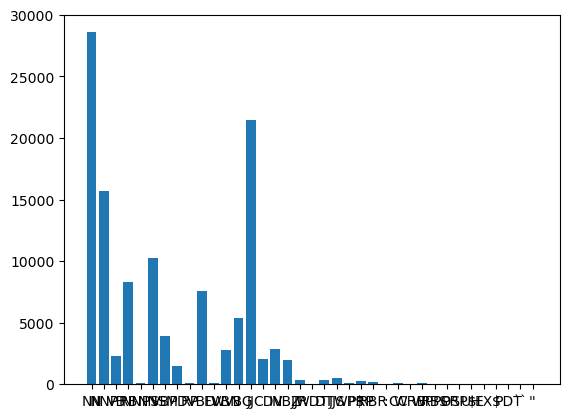

In [72]:
import matplotlib.pyplot as plt
plt.bar(pos_freq.keys(), pos_freq.values())
plt.show()




In [73]:
# use nltk to perform semantic analysis on the dataset
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
sentence = sent_tokenize(text)
for i in sentence:
    score = 0
    score += sia.polarity_scores(i)['compound']
avg_score = score / len(sentence)
if avg_score > 0.05:
    overall_sentiment = 'positive'
else:
    overall_sentiment = 'negative'
print("Average Sentiment Score:", avg_score)
print("Overall Text Sentiment:", overall_sentiment)

     

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\12552\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Average Sentiment Score: 4.3775187888029625e-05
Overall Text Sentiment: negative
